# Task06 掌握分类问题的评估及超参数调优

## 1 知识梳理

### 1.1 用管道简化工作流
- 使用`sklearn.pipeline.make_pipeline`建立工作流
- 使用`sklearn.pipelime.Pipeline`构建工作流对象，然后在使用该对象的`fit`方法

### 1.2 使用k折交叉验证评估模型性能
- 具体步骤：
    1. 将数据集随机分成$k$个数量基本一致的组，将第1组作为验证集，其余$k-1$组作为训练集
    2. 计算验证集的均方误差$\text{MSE}_1$
    3. 重复步骤(1)(2)$k$次，将得到的$k$个$\text{MSE}$取平均：$$CV_{(k)}=\frac{1}{k}\sum_{i=1}^k \text{MSE}_i$$
- $k$折交叉验证：使用`sklearn.model_selection.cross_val_score`
- 分层$k$折交叉验证：使用`sklearn.model_selection.StratifiedKFold`

### 1.3 使用学习和验证曲线调试算法

- 用学习曲线诊断偏差与方差：使用`sklearn.model_selection.learning_curve`
- 用验证曲线解决欠拟合和过拟合：使用`sklearn.model_selection.validation_curve`

### 1.4 通过网格搜索进行超参数调优
- 网格搜索：使用`sklearn.model_selection.GridSearchCV`
- 随机网格搜索：使用`sklearn.model_selection.RandomizedSearchCV`
- 嵌套交叉验证：构建网格搜索对象，并在交叉验证中传入网格搜索对象

### 1.5 比较不同的性能评估指标

- 混淆矩阵
    1. 误差率：$\displaystyle ERR= \frac{FP+FN}{FP+FN+TP+TN}$
    2. 准确率：$\displaystyle ACC=\frac{TP+TN}{FP+FN+TP+TN}$
    3. 假阳率：$\displaystyle FPR=\frac{FP}{N}=\frac{FP}{FP+TN}$
    4. 真阳率：$\displaystyle TPR=\frac{TP}{P}=\frac{TP}{FN+TP}$
    5. 精度：$\displaystyle PRE=\frac{TP}{TP+FP}$
    6. 召回率：$\displaystyle REC=TPR=\frac{TP}{P}=\frac{TP}{FN+TP}$
    7. $\displaystyle \text{F1-score}=2 \cdot \frac{PRE \times REC}{PRE + REC}$
- 各种指标计算：  
  准确率：使用`sklearn.metrics.precision_score`  
  召回率：使用`sklearn.metrics.recall_score`  
  F1-Score：使用`sklearn.metrics.f1_score`

## 2 实战练习

本例使用sklearn内置数据集：葡萄酒识别数据集

In [1]:
# 引入相关科学计算包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use("ggplot")      
import seaborn as sns

In [2]:
from sklearn import datasets
# sklearn内置数据集：葡萄酒识别数据集
wine = datasets.load_wine()
X = wine.data
y = wine.target
features = wine.feature_names
wine_data = pd.DataFrame(X, columns=features)
wine_data['target'] = y
wine_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


各个特征的相关解释：
   - alcohol：酒精
   - malic_acid：苹果酸
   - ash：灰
   - alcalinity_of_ash：灰的碱度
   - magnesium：镁
   - total_phenols：总酚
   - flavanoids：类黄酮
   - nonflavanoid_phenols：非类黄酮酚
   - proanthocyanins：原花青素
   - color_intensity：色彩强度
   - hue：色调
   - od280/od315_of_diluted_wines：稀释酒的OD280 / OD315
   - proline：脯氨酸

### 2.1 使用网格搜索进行超参数调优

#### 2.2.1 使用网格搜索`GridSearchCV()`

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time

start_time = time.time()
pipe_svc = make_pipeline(StandardScaler(),SVC(random_state=1))
param_range = [0.0001,0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
param_grid = [{'svc__C':param_range,'svc__kernel':['linear']},{'svc__C':param_range,'svc__gamma':param_range,'svc__kernel':['rbf']}]
gs = GridSearchCV(estimator=pipe_svc,param_grid=param_grid,scoring='accuracy',cv=10,n_jobs=-1)
gs = gs.fit(X,y)
end_time = time.time()
print("网格搜索经历时间：%.3f S" % float(end_time-start_time))
print('最佳得分:', gs.best_score_)
print('最优参数是:', gs.best_params_)

网格搜索经历时间：3.285 S
最佳得分: 0.9833333333333334
最优参数是: {'svc__C': 1.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


#### 2.2.2 随机网格搜索RandomizedSearchCV()

In [4]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
import time

start_time = time.time()
pipe_svc = make_pipeline(StandardScaler(),SVC(random_state=1))
param_range = [0.0001,0.001,0.01,0.1,1.0,10.0,100.0,1000.0]
param_grid = [{'svc__C':param_range,'svc__kernel':['linear']},{'svc__C':param_range,'svc__gamma':param_range,'svc__kernel':['rbf']}]
# param_grid = [{'svc__C':param_range,'svc__kernel':['linear','rbf'],'svc__gamma':param_range}]
gs = RandomizedSearchCV(estimator=pipe_svc, param_distributions=param_grid,scoring='accuracy',cv=10,n_jobs=-1)
gs = gs.fit(X,y)
end_time = time.time()
print("随机网格搜索经历时间：%.3f S" % float(end_time-start_time))
print('最佳得分:', gs.best_score_)
print('最优参数是:', gs.best_params_)

随机网格搜索经历时间：0.236 S
最佳得分: 0.9774509803921569
最优参数是: {'svc__kernel': 'rbf', 'svc__gamma': 0.001, 'svc__C': 10.0}


### 2.3 混淆矩阵和ROC曲线

In [5]:
# 查看数据集的分类数，可知有3类
wine_data['target'].unique()
wine_data['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [6]:
# 取出类别0和1作为基础数据集
df = wine_data.query("target==[0,1]")
y = df['target'].values
X = df.iloc[:, :-1].values

#### 2.3.1 绘制混淆矩阵

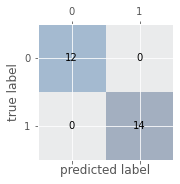

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=1)
pipe_svc = make_pipeline(StandardScaler(),SVC(random_state=1))

pipe_svc.fit(X_train,y_train)
y_pred = pipe_svc.predict(X_test)
# 得到混淆矩阵
confmat = confusion_matrix(y_true=y_test,y_pred=y_pred)

fig,ax = plt.subplots(figsize=(2.5,2.5))
ax.matshow(confmat, cmap=plt.cm.Blues,alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j,y=i,s=confmat[i,j],va='center',ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

#### 2.3.2 绘制ROC曲线

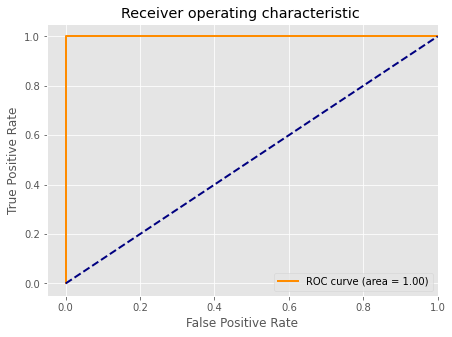

In [8]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import make_scorer,f1_score
scorer = make_scorer(f1_score,pos_label=0)
# 使用网格搜索
gs = GridSearchCV(estimator=pipe_svc,param_grid=param_grid,scoring=scorer,cv=10)
y_pred = gs.fit(X_train,y_train).decision_function(X_test)
# 得到真阳率和假阳率
fpr,tpr,threshold = roc_curve(y_test, y_pred)
# 得到AUC值
roc_auc = auc(fpr,tpr)

# 绘制ROC曲线
lw = 2
plt.figure(figsize=(7,5));
# 设置假阳率为横坐标，真阳率为纵坐标
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic ')
plt.legend(loc="lower right")
plt.show()